In [4]:
import os
import gdown

# --- Configuration ---
# The Google Drive link to your file
url = 'https://drive.google.com/uc?id=1vBE48dpWDXARqMRxtzdqwJw1wVkSa8yz'

# Define the folder and filename for the output
output_folder = 'data'
file_name = 'hummus_recipes.csv'
destination_path = os.path.join(output_folder, file_name)

# 1. Check if the output folder exists, create it if it doesn't
if not os.path.exists(output_folder):
    print(f"Directory '{output_folder}' not found. Creating it.")
    os.makedirs(output_folder)
else:
    print(f"Directory '{output_folder}' already exists.")

# 2. Check if the file already exists, download it if it doesn't
if not os.path.exists(destination_path):
    print(f"File '{file_name}' not found. Starting download...")
    # Use gdown to download the file from the URL to the destination path
    gdown.download(url, destination_path, quiet=False)
    print(f"✅ Download complete! File saved to '{destination_path}'")
else:
    print(f"File '{file_name}' already exists in '{output_folder}'. Skipping download.")

Directory 'data' already exists.
File 'hummus_recipes.csv' already exists in 'data'. Skipping download.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually pleasing style for the plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
file_path = 'data/hummus_recipes.csv'
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")

C:\Users\usama\AppData\Local\Temp\ipykernel_16392\3756704612.py:11: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Dataset loaded successfully!


In [6]:
# Display the first 5 rows to see the columns and sample data
print("First 5 rows of the dataset:")
display(df.head())

# Get a concise summary of the dataframe (column types, non-null counts)
print("\nDataset Info:")
df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the dataset:


,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,...,sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",409184,40.0,['Preheat oven to 275 degrees. In a very large...,"{'': [('popcorn, popped', '12 time(s) cups ')...",20,2011-01-29,...,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'brown sugar', 'butter', 'corn..."
1,1,53662,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,64251,20.0,"['After you chop the tomatoes, onions and cila...",{'': [('shelled and cooked shrimp (50-60 count...,2-4,2009-06-03,...,6.3,51.3,7,10,0.335455,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['avocado', 'cilantro', 'cooked shrimp', 'garl..."
2,2,520465,Inbal Jerusalem Hotel Snowball,This recipe was created in response to a Janua...,1803632771,210.0,"['Combine gelatin with cold water', 'Combine c...","{'': [('cream', '200 time(s) g '), ('vanilla ...",5,2015-01-08,...,78.0,87.7,12,17,0.128082,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['cold water', 'condensed milk', 'cornflour', ..."
3,3,213601,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,183057,375.0,['Trim excess fat and silver skin from lamb le...,"{'': [('of lamb', '6 time(s) lbs leg '), ('dr...",10-12,2009-05-17,...,3.6,51.1,8,8,0.320622,0.375,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['dried mint flakes', 'dried oregano', 'dried ..."
4,4,67731,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,37779,38.0,"['In a mixing bowl, add the egg, sesame oil, a...","{'': [('egg, beaten', '1 time(s) '), ('toaste...",4,2007-11-21,...,4.2,30.3,6,12,0.254427,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'egg', 'fine dry breadcrumbs', 'ga..."



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507335 entries, 0 to 507334
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                507335 non-null  int64  
 1   recipe_id                 507335 non-null  int64  
 2   title                     507335 non-null  object 
 3   description               497228 non-null  object 
 4   author_id                 507335 non-null  int64  
 5   duration                  499997 non-null  float64
 6   directions                507335 non-null  object 
 7   ingredients               507333 non-null  object 
 8   serves                    435937 non-null  object 
 9   last_changed_date         507335 non-null  object 
 10  food_kg_locator           507335 non-null  object 
 11  recipe_url                507335 non-null  object 
 12  tags                      230649 non-null  object 
 13  new_recipe_id             507

,Unnamed: 0,recipe_id,author_id,duration,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],...,sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score
count,507335.000000,507335.000000,5.073350e+05,499997.000000,507335.000000,507335.000000,507335.000000,507335.000000,507335.000000,5.073350e+05,...,5.073350e+05,507335.000000,507335.000000,507335.000000,507335.000000,507335.000000,507335.000000,506208.000000,491831.000000,507335.000000
mean,253667.000000,264004.612690,1.894341e+07,64.794413,253667.000000,52267.244089,2.422600,2.841194,6.998514,3.782112e+02,...,7.612783e+02,48.982741,3.828046,21.858976,17.417222,6.550453,9.318421,0.217909,0.453723,0.239719
std,146455.143747,150977.971066,1.855870e+08,95.036256,146455.143747,93861.812052,2.327855,15.284632,93.266388,2.677285e+03,...,4.076175e+03,182.175308,8.565392,144.003945,39.809875,4.208233,4.032282,0.062764,0.282566,0.241530
min,0.000000,38.000000,2.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.750000e+02,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,126833.500000,133289.500000,6.846000e+04,20.000000,126833.500000,1099.000000,0.000000,0.000000,3.000000,1.200000e+02,...,1.230000e+02,12.800000,0.800000,2.500000,3.500000,4.000000,6.000000,0.182887,0.250000,0.000000
50%,253667.000000,263932.000000,2.326690e+05,40.000000,253667.000000,5193.000000,3.500000,1.000000,4.000000,2.180000e+02,...,3.522000e+02,28.100000,2.100000,6.400000,9.100000,6.000000,9.000000,0.219913,0.375000,0.250000
75%,380500.500000,394235.500000,5.317680e+05,65.000000,380500.500000,40449.000000,5.000000,2.000000,8.000000,3.800000e+02,...,7.892000e+02,51.000000,4.500000,17.900000,25.000000,8.000000,12.000000,0.262264,0.750000,0.250000
max,507334.000000,538222.000000,2.001112e+09,1425.000000,507334.000000,302411.000000,5.000000,3081.000000,32767.000000,1.595816e+06,...,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,107.000000,50.000000,0.494434,1.000000,1.000000


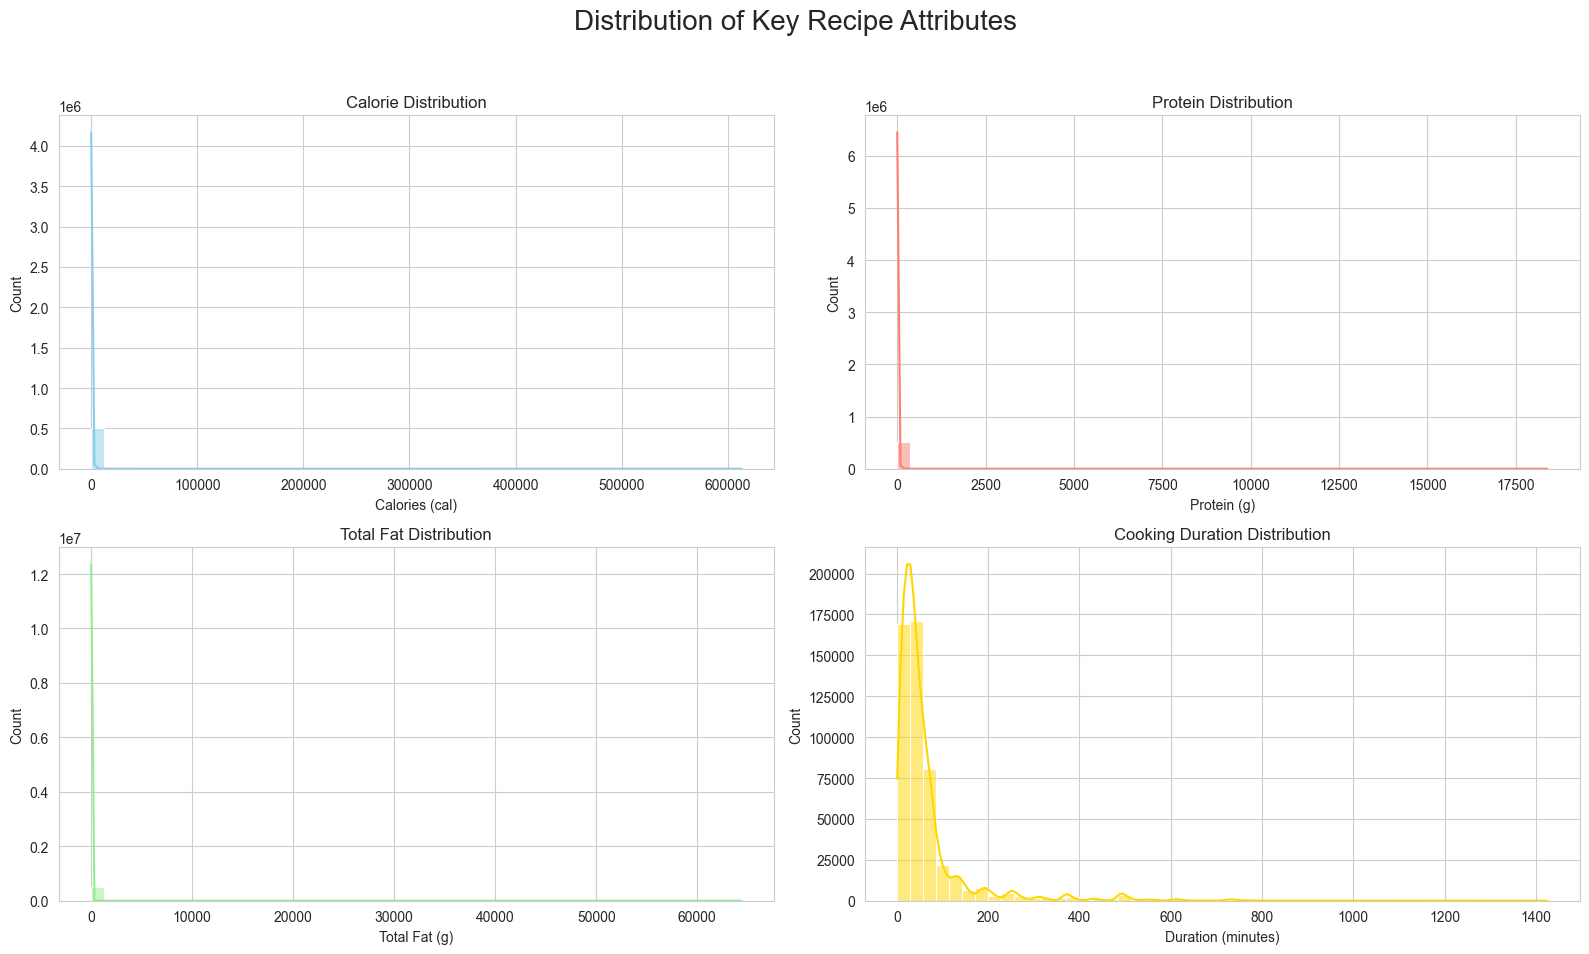

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Key Recipe Attributes', fontsize=20)

# Plot 1: Calories
sns.histplot(df['calories [cal]'], bins=50, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Calorie Distribution')
axes[0, 0].set_xlabel('Calories (cal)')

# Plot 2: Protein
sns.histplot(df['protein [g]'], bins=50, ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Protein Distribution')
axes[0, 1].set_xlabel('Protein (g)')

# Plot 3: Total Fat
sns.histplot(df['totalFat [g]'], bins=50, ax=axes[1, 0], kde=True, color='lightgreen')
axes[1, 0].set_title('Total Fat Distribution')
axes[1, 0].set_xlabel('Total Fat (g)')

# Plot 4: Duration
sns.histplot(df['duration'], bins=50, ax=axes[1, 1], kde=True, color='gold')
axes[1, 1].set_title('Cooking Duration Distribution')
axes[1, 1].set_xlabel('Duration (minutes)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()